<a href="https://colab.research.google.com/github/victornator25/Data-Science/blob/main/Tarea2_mapa_coropleicoMX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

Dataframe obtenido de: https://www.inegi.org.mx/app/tabulados/interactivos/?pxq=Museos_Museos_12_884b630d-9296-40dc-8198-f50557ebedd4

El dataframe contiene un conteo de los museos operando por entidad federativa, recordemos que en 2020 atravesabamps una pandemia por lo que es interesante ver en qué lugares hubo más museos operando, esto nos puede hablar de qué tan fuerte fueron las restricciones por entidad, aunque también depende de la cantidad de museos por entidad federativa.

In [20]:
data= pd.read_excel('Museos_12.xlsx')
df_0=pd.DataFrame(data)
#para desplegar los nombres de las columnas del DataFrame
df_0

,Instituto Nacional de Estadística y Geografía (INEGI),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Museos por entidad de registro según servicio ...,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Museos,NaN,NaN,NaN,NaN,NaN,NaN
3,Entidad de registro,2020,2020,2020,2021,2021,2021
4,Entidad de registro,Total,Con servicio disponible,Sin servicio disponible,Total,Con servicio disponible,Sin servicio disponible
5,Total,1003,33,970,1046,88,958
6,Aguascalientes,1,0,1,10,0,10
7,Baja California,19,4,15,19,2,17
8,Baja California Sur,7,0,7,7,0,7
9,Campeche,16,0,16,12,0,12


In [21]:
#Modificando el DataFrame para poder usar los datos de sus columnas
df = df_0.dropna()
df.columns = ['Entidad de Registro', 'Total 2020', 'Con servicio disponible 2020', 'Sin servicio deisponible 2020', 
              'Total 2021', 'Con servicio disponible 2021', 'Sin servicio deisponible 2021']

df_new = df.iloc[3:]

df_new.head()

,Entidad de Registro,Total 2020,Con servicio disponible 2020,Sin servicio deisponible 2020,Total 2021,Con servicio disponible 2021,Sin servicio deisponible 2021
6,Aguascalientes,1,0,1,10,0,10
7,Baja California,19,4,15,19,2,17
8,Baja California Sur,7,0,7,7,0,7
9,Campeche,16,0,16,12,0,12
10,Coahuila de Zaragoza,56,2,54,57,2,55


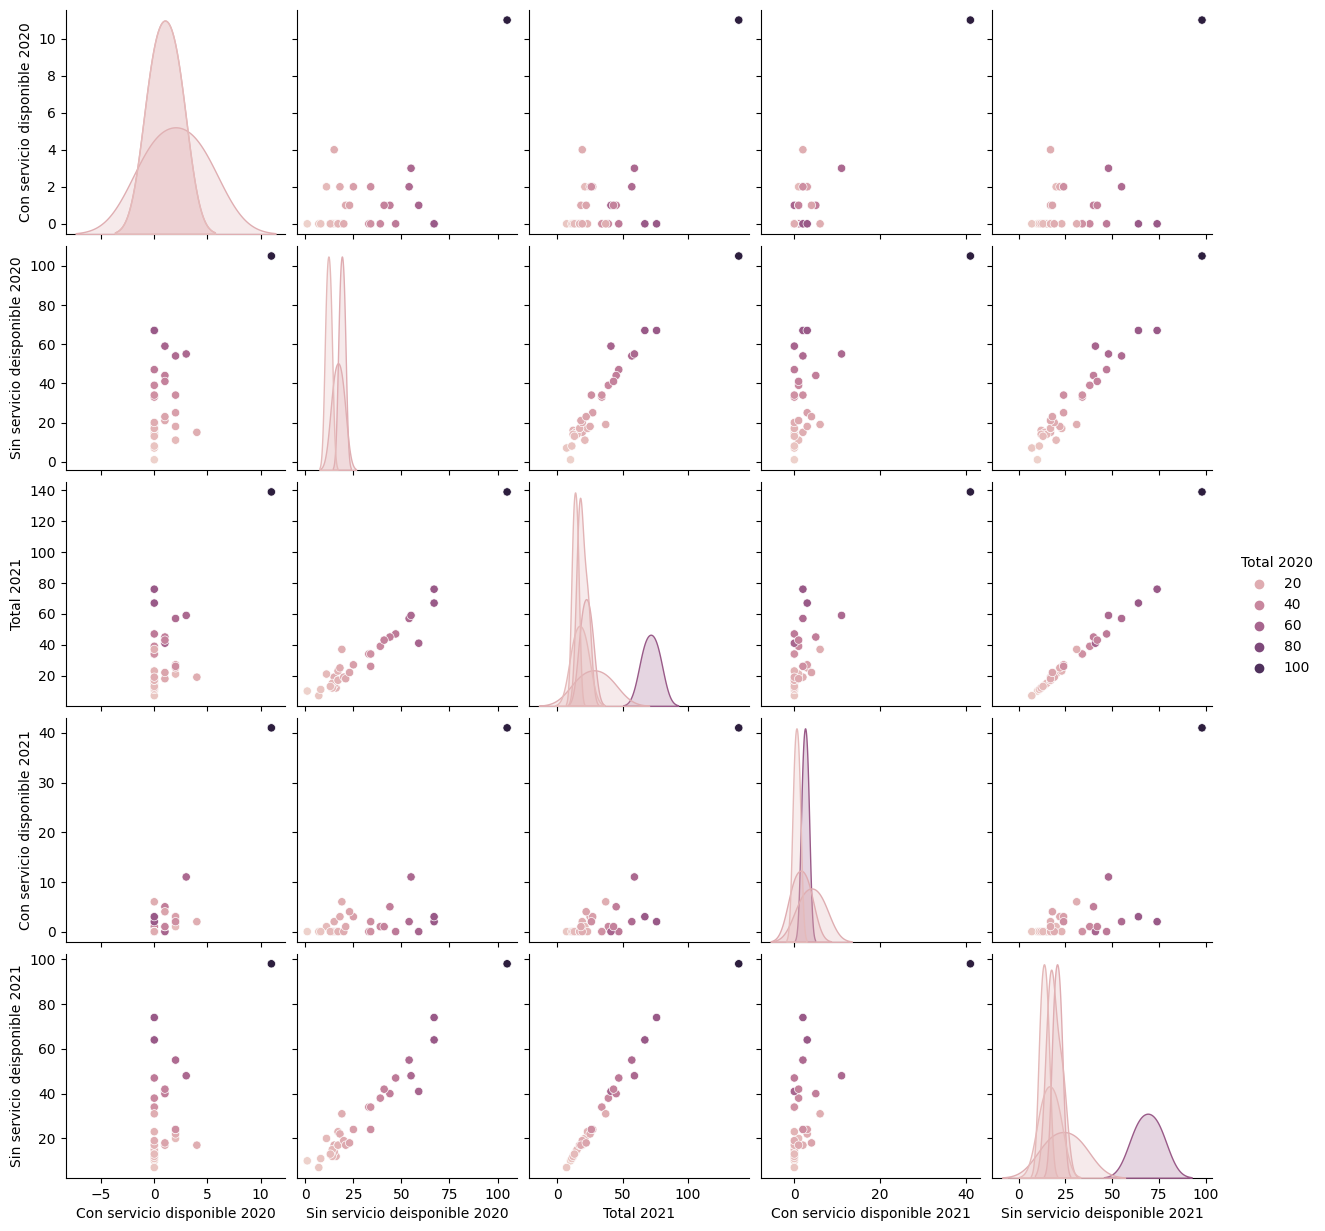

In [28]:
# Pairplot
sns.pairplot(data=df_new, hue='Total 2020')
plt.show()

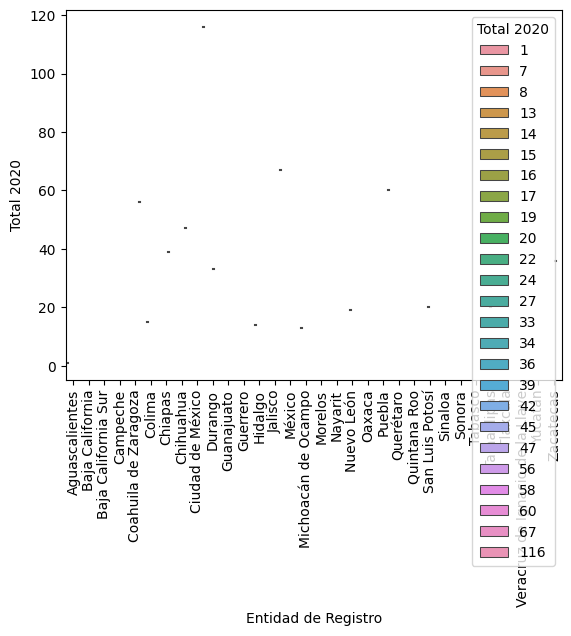

In [29]:
# Violinplot
sns.violinplot(x='Entidad de Registro', y='Total 2020', data=df_new, hue='Total 2020')
plt.xticks(rotation=90)
plt.show()

In [40]:
# Heatmap
sns.heatmap(df_new)


In [15]:
estados_geo = f'https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json'

In [16]:
data_map = df_new.groupby('Entidad de Registro')['Con servicio disponible 2020'].max()

data_map = pd.DataFrame(data_map).reset_index()
data_map.head()

,Entidad de Registro,Con servicio disponible 2020
0,Aguascalientes,0
1,Baja California,4
2,Baja California Sur,0
3,Campeche,0
4,Chiapas,0


In [18]:
m = folium.Map(location=[22, -50], zoom_start=2, width='100%', height='100%',position='bottomLeft')
folium.Choropleth(
    geo_data=estados_geo,
    name='choropleth',
    data=data_map,
    columns=['Entidad de Registro', 'Con servicio disponible 2020'],
    key_on='feature.properties.name',
    fill_color='YlGnBu', #'BuPu',
    fill_opacity=0.9,
    line_opacity=0.2,
    nan_fill_color = 'white',
    line_color="purple", 
    line_weight=1,
    legend_name='Museos Operando en 2020',
).add_to(m)

folium.LayerControl().add_to(m)
m